<a href="https://colab.research.google.com/github/AdinGarbowit/Prob-and-Stats--AG/blob/main/Notes_Hahn_Math_24_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-3,3,100) #defining x as between -3 and 3 with 100 intervals inbetween the two

In [3]:
y = x**2 + 2 #defining y as x squared plus 2

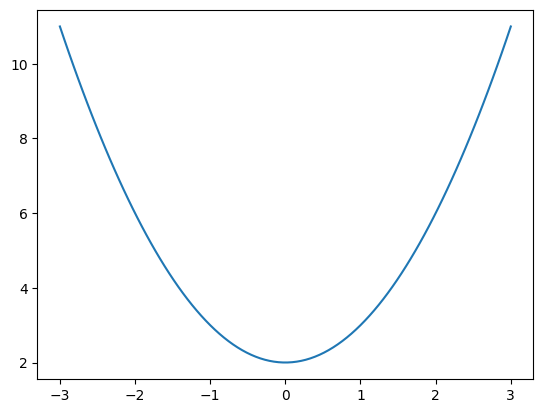

In [4]:
plt.plot(x,y) #plots x and y (parabola)

In [5]:
#Area under a curve can be found with an integral. The integral of x^2 + 2 from 1 to 2 is 13/3

$f(x) = x^2 + 2$

$Area = \int_a^bf(x) dx$

$= \int_a^b (x^2+2) dx$

$= \left.\frac{x^3}{3}+2x\right\vert_1^2$

$= (\frac{8}{3}+4) - (\frac{1}{3}+2)$

$= \frac{13}{3}$

In [6]:
13/3 #decimal value of 13/3 (area under the curve)

4.333333333333333

To integrate the function $f(x)$ over the interval $[a,b]$ we

[1] find some value $M$ such that $f(x) < M$ over the interval $[a,b]$

[2] select a random number $x$ from a uniform distribution over the interval $[a,b]$

[3] select a random number y from a uniform distribution over the interval $[0,M]$

[4] determine if $y > f(x)$ or $y ≤ f(x)$

[5] repeat this process $N$ times, keeping track of the number of times $y ≤ f(x)$ or under the curve, successes $S$.

The estimated probability of success is then:

$\frac{S}{N}=\frac{\text{Area under curve}}{\text{Total area inside rectangle}} = \frac{\int_a^bf(x)dx}{M(b-a)}$

$\int_a^bf(x)dx = M(b-a)\frac{S}{N}$

In [7]:
def f(x): #function of f(x) is defined as x squared plus 2
    y = x**2 + 2
    return y

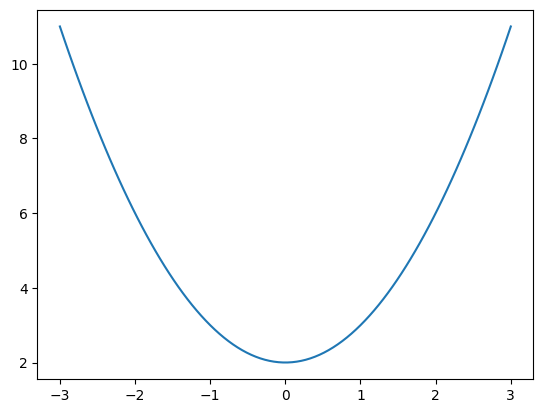

In [8]:
plt.plot(x,f(x)) #plots x and f(x)

The idea of Monte Carlo Integration is to randomly generate points that are either below or above the given curve. The ratio of the points above the curve to the points below the curve can be used to approximate the area under the curve. More random points leads to higher accuracy

In [9]:
M = 10

In [10]:
a = 1 #a and b are the x bounds for the area we want to calculate. In this case, the area is being evaluated from x = 1 to x = 2 (a and b)
b = 2

In [11]:
x = a + (b-a)*np.random.random() #x is defined as the the product of b-a multipled by a normally distributed random number, then added to a

In [12]:
x #prints the random value of x

1.3790429991722033

In [13]:
y = M*np.random.random() #y is defined as the set value of M (10) multiplied by a normally distributed random number

In [14]:
x,y,f(x) #prints the value of x, y, and f(x) in a comma seperated list

(1.3790429991722033, 2.2452481701752616, 3.9017595935658655)

In [15]:
y < f(x) #this checks if y is less than the value of f(x). This is important for finding out whether the randomly generated number is below or above the curve

True

In [16]:
N = 100_000 #N is the number of times the process will repeat (in this case, 100,000 times)
S = 0 #S starts out at 0 but will be added to as the blew process repeats
for i in range(N): #repeats 100,000 times

    x = a + (b-a)*np.random.random() #x is defined as the the product of b-a multipled by a normally distributed random number, then added to a
    y = M*np.random.random() #y is defined as the set value of M (10) multiplied by a normally distributed random number

    S += (y < f(x)) #everytime the value of y is less than the value of f(x), S is added to

M*(b-a)*(S/N) #M(b-a)*(S/N) is the Monte Carlo Integration Approximation formula. Using the values gained from the repeated process above, an approximation of the area under the curve is found
#this loop generates a number around 4.33, which is accurate to the exact value to 2 decimal places. The higher the value of N, the higher the accuracy of the program

4.3305

In [17]:
def f(x): #function of f(x) is defined as x squared plus 2
    y = x**2 + 2
    return y

In [18]:
def monte_carlo_integrate(f,a,b,N): #creating a function that can be called to monte carlo integrate a given input with bounds

    N = 10000000 #N is set to 10000000 to achieve a high degree of accuracy
    S = 0 #like above, S is started at 0, but will be added to as the loop repeats
    for i in range(N): #repeats 10000000 times

        x = a + (b-a)*np.random.random() #x is defined as the the product of b-a multipled by a normally distributed random number, then added to a
        y = M*np.random.random()  #y is defined as the set value of M (10) multiplied by a normally distributed random number

        S += (y < f(x)) #checking to see if the value of y is less than the value of f(x)

    return M*(b-a)*(S/N) #returns the approximation of the area under the curve using the approximation formula

In [19]:
monte_carlo_integrate(f,1,2,1000) #integrating f(x) from 1 to 2 using 1000 random points

4.33473

In [20]:
from sympy import * #sympy is a symbolic python library. It includes various mathematical functions and treats letters as symbols rather than requiring specific inputted values

In [21]:
x = Symbol('x') #defines the variable x as the symbol x

In [22]:
x #prints x as a symbol x

x

In [23]:
integrate(x**2 + 2, (x,1,2)) #using integrate, the integral of x^2 + 2 from bounds x = 1 to x = 2 is found

13/3

In [24]:
13/3 #the exact value of the above integral

4.333333333333333

In [25]:
integrate(x**3 + 3, (x,1,2))#using integrate, the integral of x^3 +3 from bounds x = 1 to x =2 is found

27/4

In [26]:
27/4 # the exact value of the above integral

6.75

In [27]:
x = 0 #x is being defined as 0

In [28]:
def f(x):
    y = x**3 + 3 #f(x) is being defined as x^3 + 3
    return y #returns the value of y

In [29]:
monte_carlo_integrate(f,1,2,1000) #integrates x^3 + 3 from 1 to 2 using 1000 random numbers

6.707755

In [30]:
#This code block is being used to create a convergence indicator for the monte carlo approximation. The less bumpy the plot of the convergence is the more accurate the monte carlo approximation is
N = 2000 #2000 random numbers are being used
S = 0 #S begins at 0
Z = np.zeros(N,) #Z is equal to an array with the number of elements as the size of N and each element is 0 (N in this case is 2000)
for i in range(1,N): #iterates the process for 1 less than the value of N

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

    Z[i] = M*(b-a)*(S/i) #Z[i] is indexing the values of returned from loop in order to create a convergence indicator. Z is the collection of values

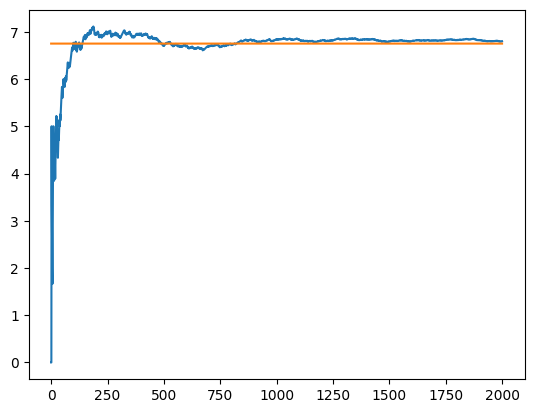

In [31]:
plt.plot(Z) #plots Z, the returned value for each iteration of the loop
plt.plot(6.75*np.ones(Z.shape)) #plots the line that Z should be approaching by multiplying the exact value (6.75) by the number of elements in Z

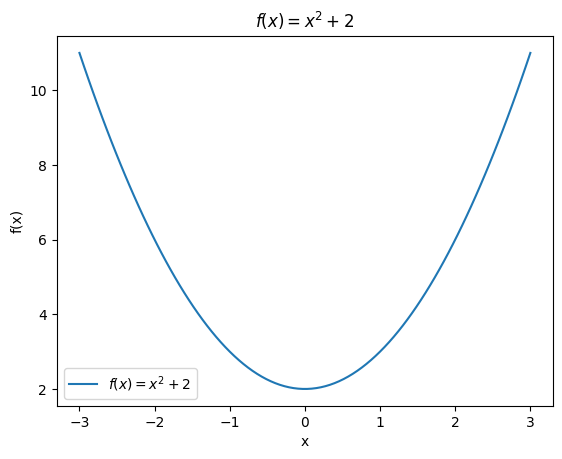

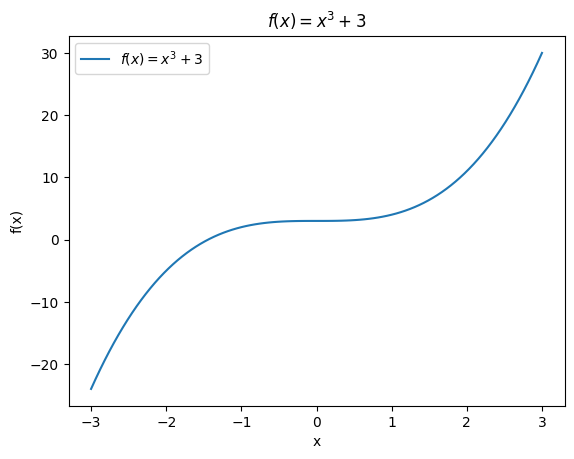

Exact Area under f1: 4.33333333333333
Estimated Area under f1: 4.3306000000000004
Exact Area under f2: 6.75000000000000
Estimated Area under f2: 6.73968


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate

# Define a general function for Monte Carlo integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0 #S starts at 0, each iteration adds to the value of S
    for _ in range(N): #repeats for the size of N
        x = a + (b - a) * np.random.random() #definition of x
        y = M * np.random.random() #definition of y
        if y < func(x): #checks if y is less than the value of func(x)
            S += 1 #adds 1 to the value of s if y is less than the value of func(x)
    return M * (b - a) * (S / N) #applys monte carlo formula

# Define the functions to be integrated
def f1(x): #f1(x) is defined as x^2 + 2
    return x**2 + 2

def f2(x): #f2(x) is defined as x^3 + 3
    return x**3 + 3

# Calculate exact and estimated areas (This portion is used to apply the create monte carlo simulation approximation and compare it with the exact value of the integral from sympy)
def calculate_areas(func, a, b, N, M):
    x_sym = Symbol('x') #x_sym is defined as the symbol x
    exact_area = integrate(func(x_sym), (x_sym, a, b)).evalf() #exact area is being evaluated for the function with the sympy integrate function
    estimated_area = monte_carlo_integrate(func, a, b, N, M) #estimated area is being evaluated for the function with the created monte carlo approximation
    return exact_area, estimated_area #returns the exact area and estimated area in a comma seperated list

# Plotting function
def plot_function(func, title, a=-3, b=3):
    x = np.linspace(a, b, 100) #x is defined as values of a and be seperated by 100 equal intervals
    y = func(x) #y is defined as func(x)
    plt.plot(x, y, label=title) #creates a plot with x,y and a label set as title
    plt.title(title)
    plt.xlabel("x") #x label of the plot is x
    plt.ylabel("f(x)") #y label of the plot is f(x)
    plt.legend() #generates legend for the plot
    plt.show() #shows the plot

# Plot the functions
plot_function(f1, "$f(x) = x^2 + 2$") #plots the x^2 +2 function and titles it with "x^2 + 2"
plot_function(f2, "$f(x) = x^3 + 3$") #plots the x^3 + 3 function and titles it with "x^3 + 3"

# Calculate and print areas
exact_area_f1, estimated_area_f1 = calculate_areas(f1, 1, 2, 100000, 20) #exact area and estimated area is defined as the calculated areas of f1 from 1 to 2 with 100000 random numbers and an M value of 20
exact_area_f2, estimated_area_f2 = calculate_areas(f2, 1, 2, 1000000, 20) #exact area and estimated area is defined as the calculated areas of f2 from 1 to 2 with 1000000 random numbers and an M value of 20

print("Exact Area under f1:", exact_area_f1) #prints all the calculated information
print("Estimated Area under f1:", estimated_area_f1)
print("Exact Area under f2:", exact_area_f2)
print("Estimated Area under f2:", estimated_area_f2)


# Visualization

This is used to add a visual element to the Monte Carlo Approximation by displaying how it uses random points above and below the curve to estimate area

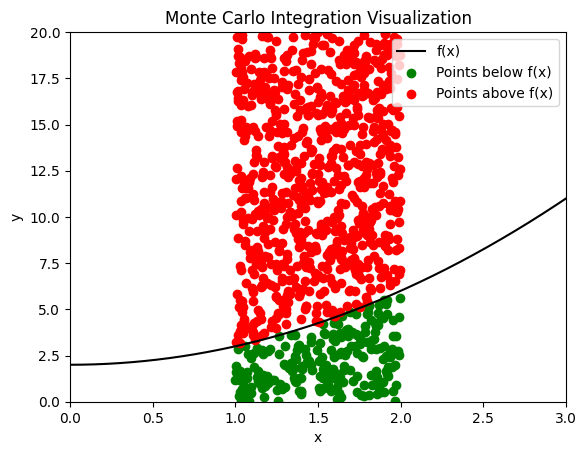

In [33]:
# Function to plot points for Monte Carlo integration
def plot_monte_carlo(func, a, b, M, N):
    x_points = a + (b - a) * np.random.random(N) #defining the x values
    y_points = M * np.random.random(N) #defining the y values
    below = y_points < func(x_points) # below is defined as being the y points that are less than the value of function when the x points are plugged in
    above = np.invert(below) # above is defined as the inverted return of below (when below is true above is false and when above is false below is true)

    # Plotting the function
    x = np.linspace(a - 1, b + 1, 400) #x is defined as the area bounds (with a-1 and b+1) with 400 equal intervals between the 2
    y = func(x) #y is defined as the func(x)
    plt.plot(x, y, label="f(x)", color='black') #plots the values of x, y in black with a label called "f(x)"

    # Plotting the points
    plt.scatter(x_points[below], y_points[below], color='green', label='Points below f(x)')
    plt.scatter(x_points[above], y_points[above], color='red', label='Points above f(x)')

    # Setting up the plot limits and labels
    plt.xlim(a - 1, b + 1) #sets the x limit of plot as the values of the bounds a and b minus 1 and plus one respectively
    plt.ylim(0, M) # sets the y limit of the plot as the values between 0 and the defintion of M
    plt.xlabel("x") #makes the x label called x
    plt.ylabel("y") #makes the y label called y
    plt.title("Monte Carlo Integration Visualization") #Makes the title of the plot "Monte Carlo Integration Visualization"
    plt.legend() #Creates a legend for the plot

    plt.show() #shows the plot

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters for Monte Carlo Integration
a, b, M, N = 1, 2, 20, 1000

# Plotting the Monte Carlo Integration
plot_monte_carlo(f, a, b, M, N)

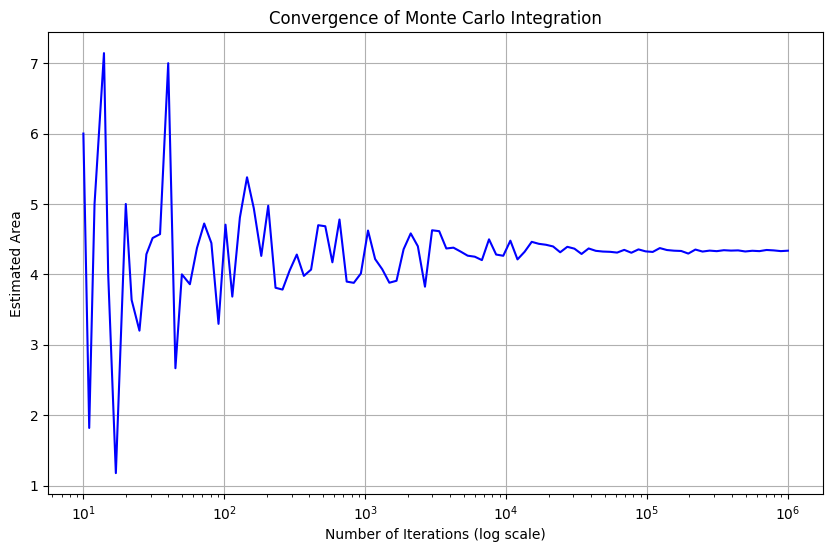

In [34]:
# Function for Monte Carlo Integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0 #S begins at 0, will be added to with each iteration of the loop
    for _ in range(N): #repeats for N defined times
        x = a + (b - a) * np.random.random() #definition of x
        y = M * np.random.random() #definition of y
        if y < func(x): #checks if the value of y is less than the value of func(x)
            S += 1 #if so, 1 is added to value of S
    return M * (b - a) * (S / N) #monte carlo formula

# Function to be integrated
def f(x): #f(x) is defined as x^2 + 2
    return x**2 + 2

# Parameters
a, b, M = 1, 2, 20 #bounds are from x = 1 to x = 2 and the M value is set to 20
iterations = np.logspace(1, 6, 100, dtype=int)  # Using logarithmically spaced iterations for smoother curve
estimated_areas = [] #begins estimated areas as an empty list

# Calculate estimated areas for different numbers of iterations
for N in iterations:
    estimated_area = monte_carlo_integrate(f, a, b, N, M) #define estimated area as the monte carlo integrate function
    estimated_areas.append(estimated_area) #appends the calculated estimated areas to the previously defined empty list estimated areas

# Plotting convergence
plt.figure(figsize=(10, 6)) #creates a figsize with a width of 10 and a height of 6
plt.plot(iterations, estimated_areas, color='blue')
plt.xscale('log') #puts the x scale of plot in terms of log
plt.xlabel('Number of Iterations (log scale)') #creates x label with title "Number of Iterations (log scale)"
plt.ylabel('Estimated Area') #creates y label with title "Estimated Area"
plt.title('Convergence of Monte Carlo Integration') #creates plot title with title "Convergence of Monte Carlo Integration"
plt.grid(True) #creates a grided background for the plot (makes it easier to evaluate points on the plot)
plt.show() #shows plot